In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, f1_score, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data/model_data.csv')

X_train = pd.read_csv('data/X_train_transformed.csv')
X_test = pd.read_csv('data/X_test_transformed.csv')
y_train = pd.read_csv('data/y_train_transformed.csv')
y_test = pd.read_csv('data/y_test_transformed.csv')

#this step is necessary because we are using the already splot data inside the pycaret setup, and indexes must not overlap on the train and test data sets

#combine balanced train data back into a single df
X_train['subscribed'] = y_train
train_data = X_train

#combine test data back into a single df
X_test['subscribed'] = y_test
test_data = X_test.set_index( np.arange(len(X_train), len(X_train)+len(X_test)))

X=train_data.drop(labels=['subscribed'], axis=1)
y=train_data['subscribed']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51190 entries, 0 to 51189
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            51190 non-null  float64
 1   job_blue-collar                51190 non-null  float64
 2   job_services                   51190 non-null  float64
 3   job_entrepreneur               51190 non-null  float64
 4   job_admin.                     51190 non-null  float64
 5   job_management                 51190 non-null  float64
 6   job_technician                 51190 non-null  float64
 7   job_housemaid                  51190 non-null  float64
 8   job_unemployed                 51190 non-null  float64
 9   job_retired                    51190 non-null  float64
 10  job_student                    51190 non-null  float64
 11  job_self-employed              51190 non-null  float64
 12  marital_married                51190 non-null 

In [2]:
from pycaret.classification import *
s = (setup( data=train_data,
            target = 'subscribed',
            test_data=test_data,
            fold=10,
            session_id = 420,
            ))

,Description,Value
0,Session id,420
1,Target,subscribed
2,Target type,Binary
3,Original data shape,"(63546, 54)"
4,Transformed data shape,"(63546, 54)"
5,Transformed train set shape,"(51190, 54)"
6,Transformed test set shape,"(12356, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=420, n_jobs=-1,n_estimators=64, max_depth=3, min_samples_split=0.1, min_samples_leaf=0.05,criterion='gini' )

rf = create_model(clf)

#tuned_rf = tune_model(rf, n_iter=5, custom_grid = parameters)
#calibrated_rf = calibrate_model(rf)
#evaluate_model(rf)

In [ ]:
save_model(rf,'saved_rf_model')

In [3]:

rf = load_model('saved_rf_model')

Transformation Pipeline and Model Successfully Loaded


In [4]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
rf_holdout_pred = predict_model(rf, probability_threshold=0.5)

#plot_model(rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
# plot_model(calibrated_rf, plot = 'calibration')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7862,0.7815,0.6508,0.2984,0.4092,0.3000,0.3340


In [ ]:
rf_calibrated_holdout_pred = predict_model(calibrated_rf)

In [ ]:
pred_train = predict_model(rf,data=train_data, probability_threshold=0.5)


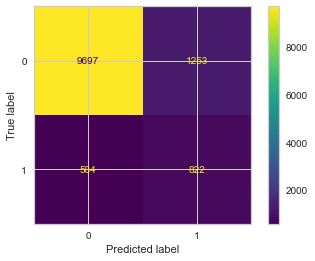

array([[9697, 1253],
       [ 584,  822]], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(rf_holdout_pred['subscribed'], rf_holdout_pred['prediction_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)

disp.plot()

plt.show()

cm

In [ ]:
interpret_model(rf)

In [ ]:
interpret_model(rf, use_train_data=True)

In [14]:
probas = rf.predict_proba(X_test.loc[:, X_test.columns != 'subscribed'])[:,1]
probas


y_true = rf_holdout_pred['subscribed']
y_pred = rf_holdout_pred['prediction_label']
predicts = rf_holdout_pred['prediction_score']

from sklearn.metrics import roc_curve

from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_true,probas)

# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))



Best Threshold=0.538868


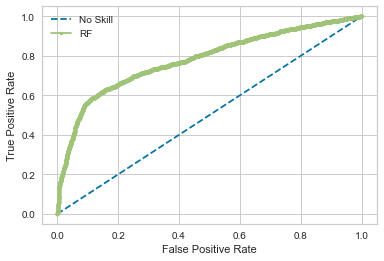

In [9]:
from matplotlib import pyplot

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='RF')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()